In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv("/content/Aarki.csv")
data.columns

Index(['LeadCreated', 'Month', 'FirstName', 'Email', 'VendorLeadID',
       'CallStatus', 'Lead Quality', 'WidgetName', 'No of form pages',
       'PublisherZoneName', 'Publisher Location', 'PublisherCampaignName',
       'AddressScore', 'PhoneScore', 'AdvertiserCampaignName', 'State',
       'DebtLevel', 'IP Address', 'Partner', 'ReferralDomain',
       'MarketingCampaign', 'AdGroup', 'Keyword', 'SearchQuery', 'ReferralURL',
       'ReferralURL Parameters', 'LandingPageURL',
       'Landing Page URL Parameters'],
      dtype='object')

In [17]:
data.dropna(how='all')

,LeadCreated,Month,FirstName,Email,VendorLeadID,CallStatus,Lead Quality,WidgetName,No of form pages,PublisherZoneName,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,01-07-2009,7.0,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,Neutral,w-302252-DebtReduction1-1DC-CreditSolutions,1DC,TopLeft-302252,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,13-04-2009,4.0,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,Neutral,w-300250-DebtReduction1-1DC-Head2,1DC,TopLeft-302252,...,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,21-04-2009,4.0,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,Bad,w-300250-DebtReduction1-1DC-Head2,1DC,TopLeft-302252,...,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,03-08-2009,8.0,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,Bad,w-302252-DebtReduction1-1DC-white,1DC,TopLeft-302252,...,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,13-04-2009,4.0,s,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,Neutral,w-300250-DebtReduction1-1DC-BlueMeter,1DC,TopLeft-302252,...,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,30-06-2009,6.0,amy,ahokett@sjc.edu,F42BBDFB-D44B-4890-A1B6-D1F0A3838214,NaN,Neutral,w-302252-DebtReduction1-1DC-white,1DC,TopLeft-302252,...,yahoo,www.att.net,DebtReductionInc,Debt Consolidation,NaN,NaN,http://www.att.net/s/s.dll,spage=search/error.htm&searchtype=epa&source=a...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
3017,25-04-2009,4.0,brandy,brandy75137@yahoo.com,EA3703A3-61C9-40CE-92F7-61F0E02B1365,NaN,Neutral,w-300250-DebtReduction1-1DC-Head2,1DC,TopLeft-302252,...,Google,googleads.g.doubleclick.net,DebtReductionInc,Student Debt,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-7025449865608971&dt=124069479896...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
3018,12-04-2009,4.0,jennifer,jennifer_woods48375@yahoo.com,64EB2632-E29E-4EB4-B361-45F1F0C735B5,NaN,Neutral,w-300250-DebtReduction1-1DC-CreditSolutions,1DC,TopLeft-302252,...,yahoo,search.yahoo.com,DebtReductionInc,Debt Consolidation,NaN,debt consolidation or settlement which is better,http://search.yahoo.com/search,ei=UTF-8&fr=yfp-t-501&SpellState=n-1665662351_...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
3019,23-09-2009,9.0,debra,debraroque@att.net,9126C7DB-F5BB-4CE1-BDCF-5E6F1841ADAD,NaN,Neutral,w-302252-DebtReduction1-1DC-yellowarrow-dark,1DC,TopLeft-302252,...,Google,NaN,state,Debt Negotiation,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LeadCreated                  3021 non-null   object 
 1   Month                        3021 non-null   float64
 2   FirstName                    3021 non-null   object 
 3   Email                        3021 non-null   object 
 4   VendorLeadID                 3021 non-null   object 
 5   CallStatus                   881 non-null    object 
 6   Lead Quality                 3021 non-null   object 
 7   WidgetName                   3021 non-null   object 
 8   No of form pages             3021 non-null   object 
 9   PublisherZoneName            3021 non-null   object 
 10  Publisher Location           3021 non-null   object 
 11  PublisherCampaignName        3021 non-null   object 
 12  AddressScore                 1171 non-null   float64
 13  PhoneScore        

In [19]:
data['Month']=data['Month'].astype('str')

In [20]:
def leads_created(x):
  if x=="DebtReductionInc":
    return "form"
  elif x== "DebtReductionCallCenter":
    return "call_centre"





data['leads_Source_type']=data['PublisherCampaignName'].apply(leads_created)

In [22]:
def campaign_type(x):
  if x=="creditsolutions-branded-shortform":
    return "Branded_Campaign"
  elif x=='Debt Settlement1 Master':
    return "Generic_Campaign"

data['campaign_type']=data['AdvertiserCampaignName'].apply(campaign_type)

In [23]:
def count_pages(x):
  if x=="1DC":
    return "One_page"
  elif x=="2DC":
    return "Two_page"

data['Ad_Pages']=data['No of form pages'].apply(count_pages)

# EDA(Exploratory Data Analysis)

<font color=orange>UNIVARIATE ANALYSIS

<Axes: ylabel='proportion'>

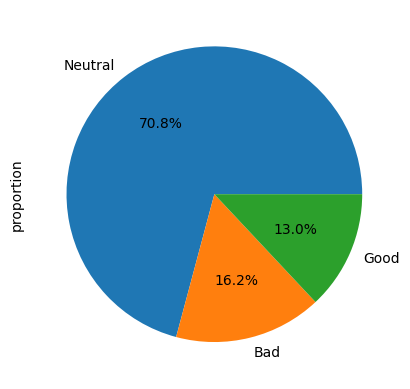

In [24]:
data['Lead Quality'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='proportion'>

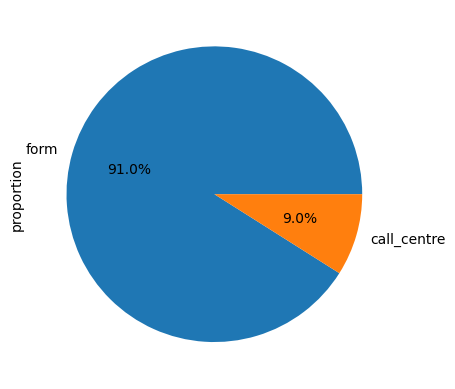

In [25]:
data['leads_Source_type'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')


In [26]:
data['leads_Source_type'].value_counts()

,count
leads_Source_type,
form,2750
call_centre,271


<Axes: ylabel='proportion'>

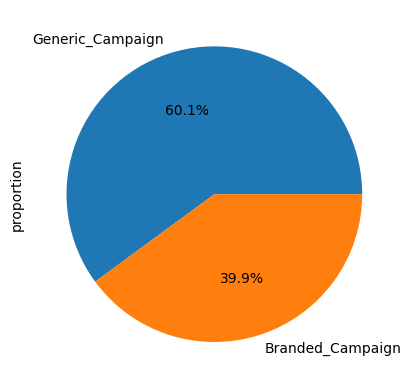

In [27]:
data['campaign_type'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='DebtLevel'>

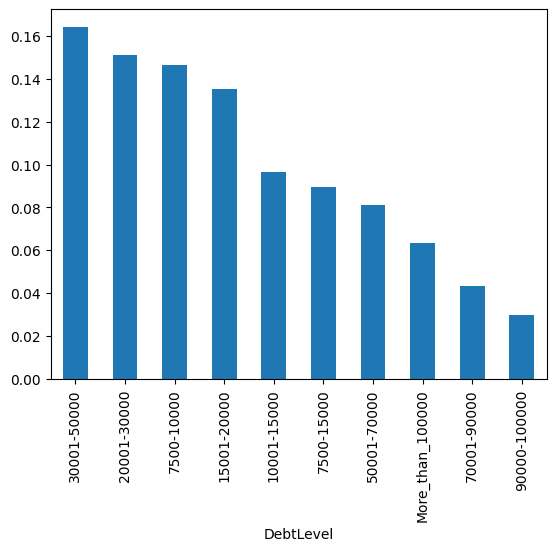

In [28]:
data['DebtLevel'].value_counts(normalize=True).plot(kind='bar')

<Axes: ylabel='proportion'>

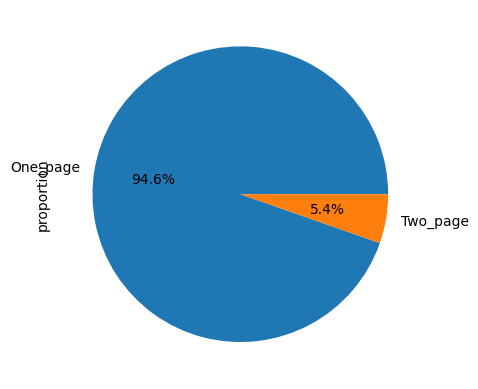

In [29]:
data['Ad_Pages'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='proportion'>

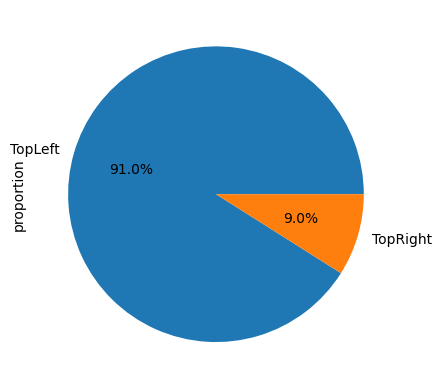

In [31]:
data['Publisher Location'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

In [32]:
data['Publisher Location'].value_counts()

,count
Publisher Location,
TopLeft,2750
TopRight,271


<Axes: ylabel='proportion'>

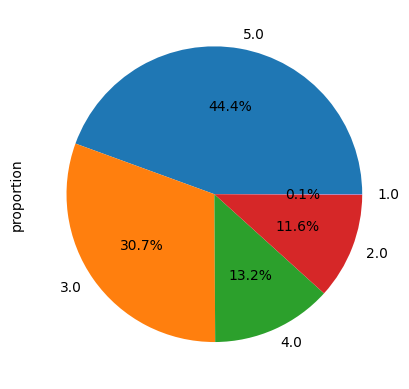

In [30]:
data['PhoneScore'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='proportion'>

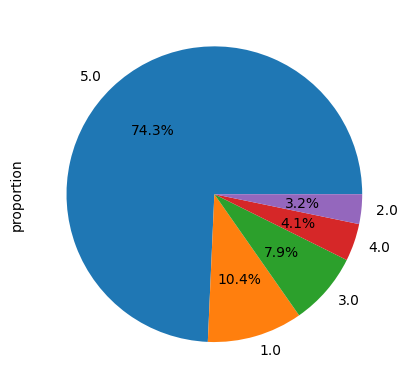

In [33]:
data['AddressScore'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

<font color=orange>BIVARIATE ANALYSIS


<Axes: xlabel='Lead Quality', ylabel='count'>

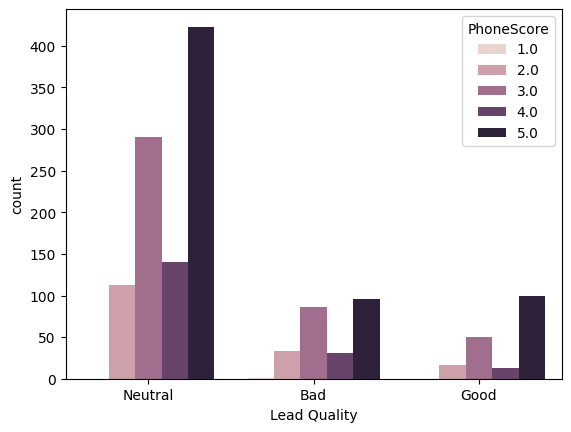

In [34]:
sns.countplot(data=data,x='Lead Quality',hue='PhoneScore')

<Axes: xlabel='Lead Quality', ylabel='count'>

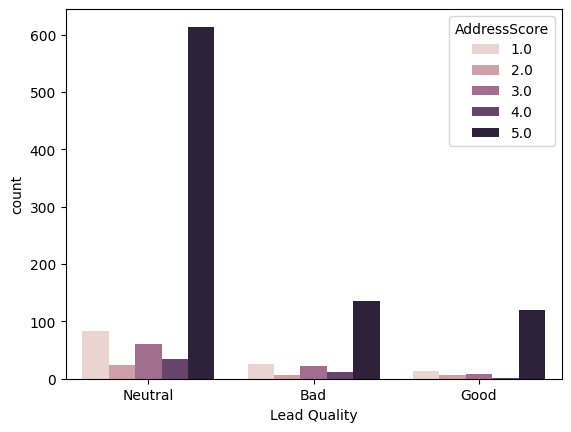

In [35]:
sns.countplot(data=data,x='Lead Quality',hue='AddressScore')

<Axes: xlabel='Lead Quality', ylabel='count'>

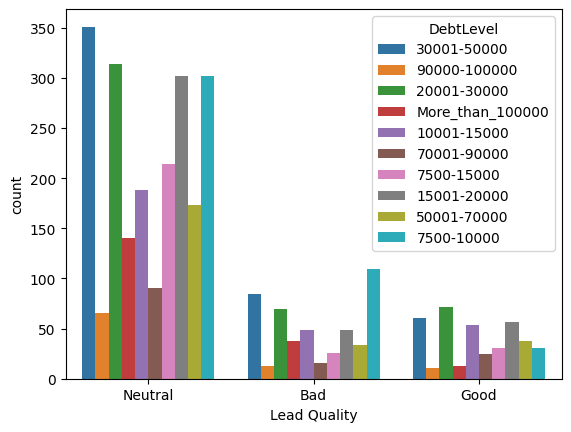

In [36]:
sns.countplot(data=data,x='Lead Quality',hue='DebtLevel')

<Axes: xlabel='Lead Quality', ylabel='count'>

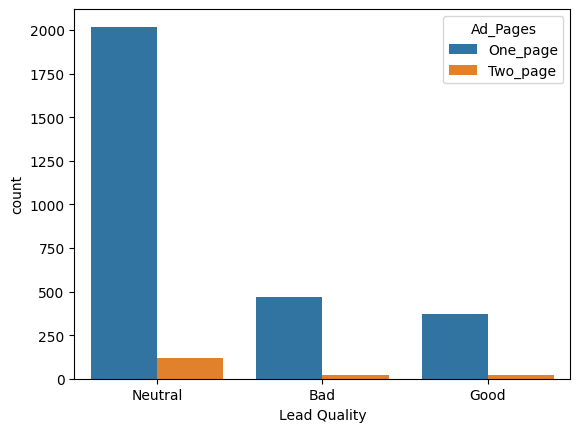

In [37]:
sns.countplot(data=data,x='Lead Quality',hue='Ad_Pages')

<Axes: xlabel='Lead Quality', ylabel='count'>

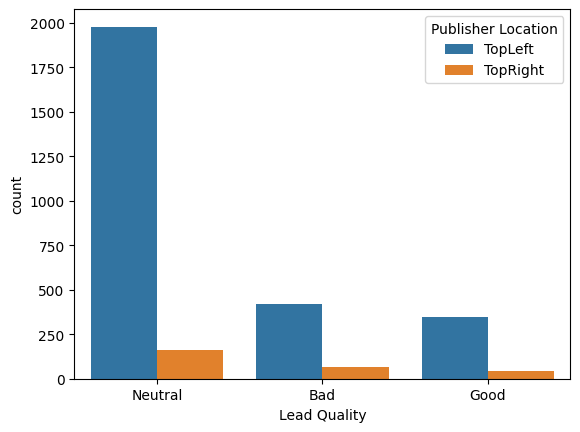

In [38]:
sns.countplot(data=data,x='Lead Quality',hue='Publisher Location')

Section -2
In this Section we will calculate the probability of  lead quality  being good or best basis



1.   PhoneScore
2.   AddressScore




In [39]:
pd.crosstab(data['Lead Quality'],data['PhoneScore'],margins=True)

PhoneScore,1.0,2.0,3.0,4.0,5.0,All
Lead Quality,,,,,,
Bad,1,33,86,31,96,247
Good,0,16,50,13,100,179
Neutral,0,113,291,140,423,967
All,1,162,427,184,619,1393


What is the probabiity of lead being good or bad given that phone score is 5?

P(Lead = Good | Phone score =5) is 0.16 (54/619) , i.e 16% chances of lead being good even if the phone score is 5


P(lead= Bad | Phone score = 5) is  0.15 (96/619) i.e <font color=orange>15% chances of lead being bad even if the phone number matches exactly

In [40]:
pd.crosstab(data['Lead Quality'],data['AddressScore'],margins=True)

AddressScore,1.0,2.0,3.0,4.0,5.0,All
Lead Quality,,,,,,
Bad,25,7,23,11,136,202
Good,14,7,9,2,120,152
Neutral,83,24,61,35,614,817
All,122,38,93,48,870,1171


What is the probabiity of lead being good or bad given that Address score is 5?

p( lead = Good | Address score =5)= 0.13 i.e 13% chances of lead being good even if the address score is 5


p( lead = bad | Address score =5)= 0.156 i.e <font color=orange>15% chances of lead being bad even if the address matches exactly


Section 3- Hypothesis Testing : In this section we will check on what all factors lead quality is dependant



1.   Is the lead quality dependant on month i.e in a particular month does the proportion of good /best /bad leads change?




# **statistically significant trend (improving or declining) in lead quality over time?**

We will use the Chi square test for the same

In [44]:
observed1=pd.crosstab(data['Month'],data['Lead Quality'])
observed1

Lead Quality,Bad,Good,Neutral
Month,,,
4.0,57,79,382
5.0,57,59,464
6.0,141,86,382
7.0,110,49,373
8.0,67,62,309
9.0,56,58,230


In [45]:
from scipy.stats import chi2_contingency

Null Hypothesis(Ho) = There is no significant trend in lead quality over time (proportions of good and bad leads remain consistent)

Alternate Hupothesis(Ha) = There is a significant trend in lead quality over time (proportions of good and bad leads vary systematically)

We have kept the margin of error at 5%(alpha /significance level)

<font color=orange>If p value is greater than alpha we will accept the null hypothesis else we will accept alternate hypothesis

In [47]:
chi_stat,p_value1,dof,exp_freq=chi2_contingency(observed1)
if p_value1 >0.05:
  print("There is no significant trend in lead quality over time (proportions of good and bad leads remain consistent)")
else:
  print("There is a significant trend in lead quality over time (proportions of good and bad leads vary systematically)")

p_value1

There is a significant trend in lead quality over time (proportions of good and bad leads vary systematically)


9.11682732339001e-13

When lead quality is described as "systematically varying across the months," it implies a pattern where the proportions of Good Quality and Bad Quality leads change in a non-random manner over time. This could indicate consistent trends. The observed variations in the proportions of good and bad leads across the months are unlikely to have occurred by random chance

For instance in our data set the proportion of good quality leads is consistently increasing from the month of June

# **Drivers of Lead Quality/Factors affecting the quality of lead**

In this section we will identify the drivers/factors affecting the quality of lead



1.   Publisher Location
2.   Lead Source Type
3.)  No of pages in ad
4.)  Campaign Type
5.) Debt Level




1.) <font color=orange>Publisher Location: Does pulblisher location(Top left or top right) have significant impact on leads quality?

Let's test this using chi square test

Null Hypothesis(Ho): No impact of publisher location on the leads quality

Alternate Hypothesis : Publisher location significantly impacts the quality of leads

Significance level=5%

If p value is greater than alpha we will accept the null hypothesis else we will accept alternate hypothesis

In [48]:
observed2=pd.crosstab(data['Lead Quality'],data['Publisher Location'],margins=True)
observed2

Publisher Location,TopLeft,TopRight,All
Lead Quality,,,
Bad,422,66,488
Good,349,44,393
Neutral,1979,161,2140
All,2750,271,3021


In [50]:
chi_stat,p_value2,dof,exp_freq=chi2_contingency(observed2)
if p_value2 >0.05:
  print("No impact of publisher location on the leads quality")
else:
  print(" We fail to accept the null hypothesis and publisher location significantly impacts the quality of leads")
p_value2

 We fail to accept the null hypothesis and publisher location significantly impacts the quality of leads


0.0024829478789759264

2.) <font color=orange>Lead Source Type: Does lead source type (call centre or through form) have significant impact on leads quality?

Let's test this using chi square test

Null Hypothesis(Ho): No impact of lead source type on the leads quality

Alternate Hypothesis : Lead source type significantly impacts the quality of leads

Significance level=5%

If p value is greater than alpha we will accept the null hypothesis else we will accept alternate hypothesis

In [51]:
observed3=pd.crosstab(data['Lead Quality'],data['leads_Source_type'],margins=True)
observed3

leads_Source_type,call_centre,form,All
Lead Quality,,,
Bad,66,422,488
Good,44,349,393
Neutral,161,1979,2140
All,271,2750,3021


In [54]:
chi_stat,p_value3,dof,exp_freq=chi2_contingency(observed3)
if p_value3 >0.05:
  print("We accept the null hypothesis and there is no impact of lead source type on the leads quality")
else:
  print(" We fail to accept the null hypothesis and lead source type does impacts the quality of leads")

p_value3

 We fail to accept the null hypothesis and lead source type does impacts the quality of leads


0.0024829478789759264

3.) <font color=orange>No of pages in ad: Does no of pages (single page or 2 page ) have significant impact on leads quality?

Let's test this using chi square test

Null Hypothesis(Ho): No impact of no of pages on the leads quality

Alternate Hypothesis :No of pages does impacts the quality of leads

Significance level=5%

If p value is greater than alpha we will accept the null hypothesis else we will accept alternate hypothesis



In [56]:
observed4=pd.crosstab(data['Lead Quality'],data['Ad_Pages'],margins=True)
observed4

Ad_Pages,One_page,Two_page,All
Lead Quality,,,
Bad,467,21,488
Good,373,20,393
Neutral,2019,121,2140
All,2859,162,3021


In [58]:
chi_stat,p_value4,dof,exp_freq=chi2_contingency(observed4)
if p_value4 >0.05:
  print("We accept the null hypothesis and there is no impact of no of pages on the leads quality")
else:
  print(" We fail to reject the null hypothesis and no of pages does impacts the quality of leads")

p_value4

We accept the null hypothesis and there is no impact of no of pages on the leads quality


0.9597874779768492

4.) <font color=orange>Campaign Type:  Does campaign type (branded or generic) have significant impact on leads quality?

Let's test this using chi square test

Null Hypothesis(Ho): No impact of campaign type on the leads quality

Alternate Hypothesis :Campaign type does impacts the quality of leads

Significance level=5%

If p value is greater than alpha we will accept the null hypothesis else we will accept alternate hypothesis


In [60]:
observed5=pd.crosstab(data['Lead Quality'],data['campaign_type'],margins=True)
observed5

campaign_type,Branded_Campaign,Generic_Campaign,All
Lead Quality,,,
Bad,190,298,488
Good,157,236,393
Neutral,859,1281,2140
All,1206,1815,3021


In [62]:
chi_stat,p_value5,dof,exp_freq=chi2_contingency(observed5)
if p_value5 >0.05:
  print("We accept the null hypothesis and there is no statistically significant evidence to suggest that campaign type affects lead quality")
else:
  print(" We fail to accept the null hypothesis and there is statistically significant evidence to suggest that campaign type affects lead quality")

p_value5

We accept the null hypothesis and there is no statistically significant evidence to suggest that campaign type affects lead quality


0.9997333898565975

5.) <font color=orange>Debt Level: Does debt level  have significant impact on leads quality?

Let's test this using chi square test

Null Hypothesis(Ho): No impact of debt on the leads quality

Alternate Hypothesis :Debt level does impacts the quality of leads

Significance level=5%

If p value is greater than alpha we will accept the null hypothesis else we will accept alternate hypothesis


In [63]:
observed6=pd.crosstab(data['Lead Quality'],data['DebtLevel'],margins=True)
observed6

DebtLevel,10001-15000,15001-20000,20001-30000,30001-50000,50001-70000,70001-90000,7500-10000,7500-15000,90000-100000,More_than_100000,All
Lead Quality,,,,,,,,,,,
Bad,49,49,70,84,34,16,109,26,13,38,488
Good,54,57,72,61,38,25,31,31,11,13,393
Neutral,188,302,314,351,173,90,302,214,66,140,2140
All,291,408,456,496,245,131,442,271,90,191,3021


In [65]:
chi_stat,p_value6,dof,exp_freq=chi2_contingency(observed6)
if p_value6 >0.05:
  print("We accept the null hypothesis and there is no impact of debt level on the leads quality")
else:
  print(" We fail to accept the null hypothesis and debt level does impacts the quality of leads")

p_value6

 We fail to accept the null hypothesis and debt level does impacts the quality of leads


1.0931119521240962e-05

In [ ]:
data.to_csv("data.csv")